GMREDI Hydrostatic run13 vs No GMREDI Hydrostatic run01
===================================================

360x360x90x8Tr_LinProfiles_BarkleyHyd_GMREDI/run13 and 360x360x90_3Tr_Linprofiles_BarkleyHyd/run01


Run13: isopyc=1 , kh=E-5, kv = E-5 Temp and salt
Run01: no isopycnal diff, kh=E-7, kv = E-7 Temp and salt

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl



In [2]:
def unstagger(ugrid, vgrid):
    """Interpolate u and v component values to values at grid cell centres.

    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.

    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`

    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`

    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u[..., 1:, :], v[..., 1:]


In [3]:
# Get field from MITgcm netCDF output
#
''' :statefile : string with /path/to/state.0000000000.t001.nc
    :fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)'''

def getField(statefile, fieldname):
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
        
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    



Inquire variable from NetCDF -  RUN13

In [6]:
filename1='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut = Dataset(filename1)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
GridOut = Dataset(filename2)

#for dimobj in GridOut.variables.values():
#    print dimobj


filename3='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3)

#for dimobj in PtracersOut.variables.values():
#    print dimobj

filename1B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run01/state.0000000000.glob.nc'
StateOut = Dataset(filename1B)

#for dimobj in StateOut.variables.values():
#    print dimobj


filename2B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run01/grid.glob.nc'
GridOut = Dataset(filename2B)

#for dimobj in GridOut.variables.values():
#    print dimobj


filename3B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run01/ptracers.0000000000.glob.nc'
PtracersOut = Dataset(filename3B)

#for dimobj in PtracersOut.variables.values():
#    print dimobj


In [7]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = getField(filename2, 'XC') # x coords tracer cells

yc = getField(filename2, 'YC') # y coords tracer cells

bathy = getField(filename2, 'Depth')

-52.5


In [8]:
zlev = 15             # level 34 corresponds to  162.5m , near shelf break

timesc = np.arange(0,len(Time),2)   # These correspond to each day




Get mask from T field (not the best, I know)

In [28]:
temp = getField(filename1, 'Temp')

temp0 = np.ma.masked_values(temp, 0)

MASK = np.ma.getmask(temp0)

tempb = getField(filename1B, 'Temp')



# Nice cell center mask
hFacC = getField(filename2,'HFacC') #(90,360,360)

hFacCmasked = np.ma.masked_values(hFacC, 0)

MASKhFacC = np.ma.getmask(hFacCmasked)

# Nice cell center mask B
hFacCB = getField(filename2B,'HFacC') #(90,360,360)

hFacCmaskedB = np.ma.masked_values(hFacCB, 0)

MASKhFacCB = np.ma.getmask(hFacCmaskedB)


# Nice cell open side mask
hFacW = getField(filename2,'HFacW') #(90,360,360)

hFacWmasked = np.ma.masked_values(hFacW, 0)

MASKhFacW = np.ma.getmask(hFacWmasked)

# Nice cell ? mask
hFacS = getField(filename2,'HFacS') #(90,360,360)

hFacSmasked = np.ma.masked_values(hFacS, 0)

MASKhFacS = np.ma.getmask(hFacSmasked)

In [10]:
#### T controls for plot ####

plt.rcParams.update({'font.size':13})

colorsTemp = [(245.0/255.0,245/255.0,245./255.0), (255/255.0,20/255.0,0)] #(khaki 1246/255.0,143./255.0  ,orangered2)

posTemp = [0, 1] 
 
NumLev = 30 # number of levels for contour



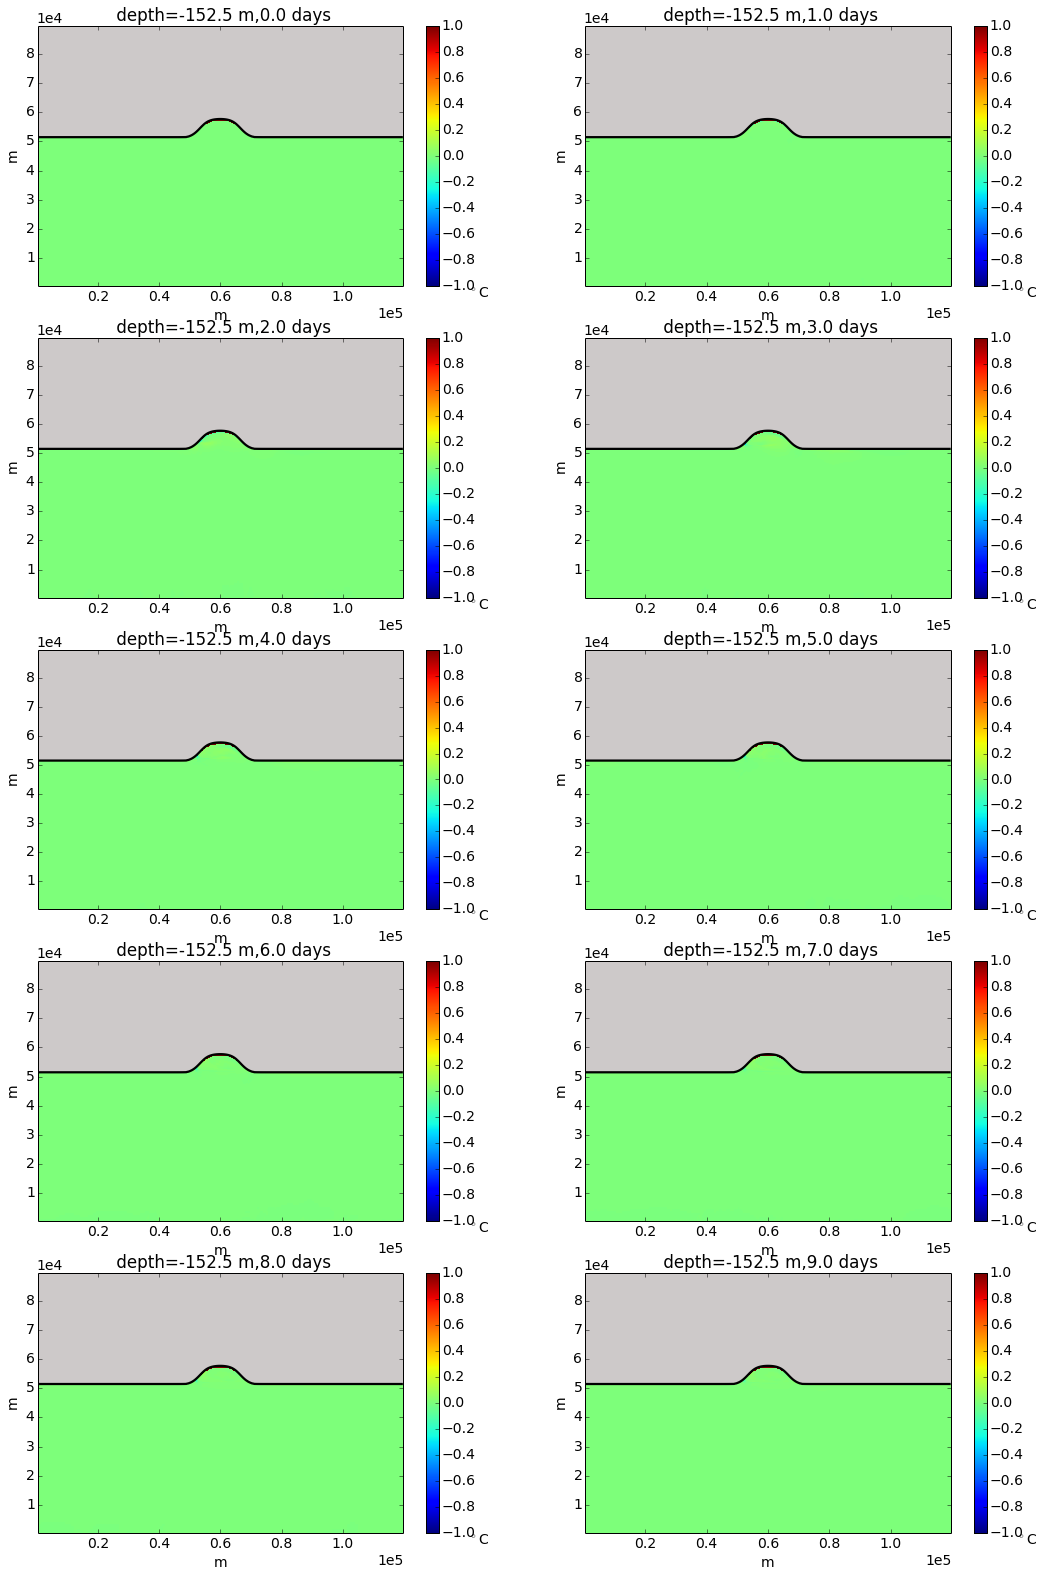

In [13]:
####  PLOT ####
zlev=30
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in range(0,19,2) :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        #plt.contourf(xc,yc,temp0[tt,zlev,:,:],NumLev)#,cmap=make_cmap(colorsTemp, position=posTemp))
        plt.pcolor(xc,yc,temp0[tt,zlev,:,:]-tempb[tt,zlev,:,:])
        pl.clim([-1,1])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/colorbar.py:829: RuntimeWarning: invalid value encountered in divide
  z = np.take(y, i0) + (xn - np.take(b, i0)) * dy / db


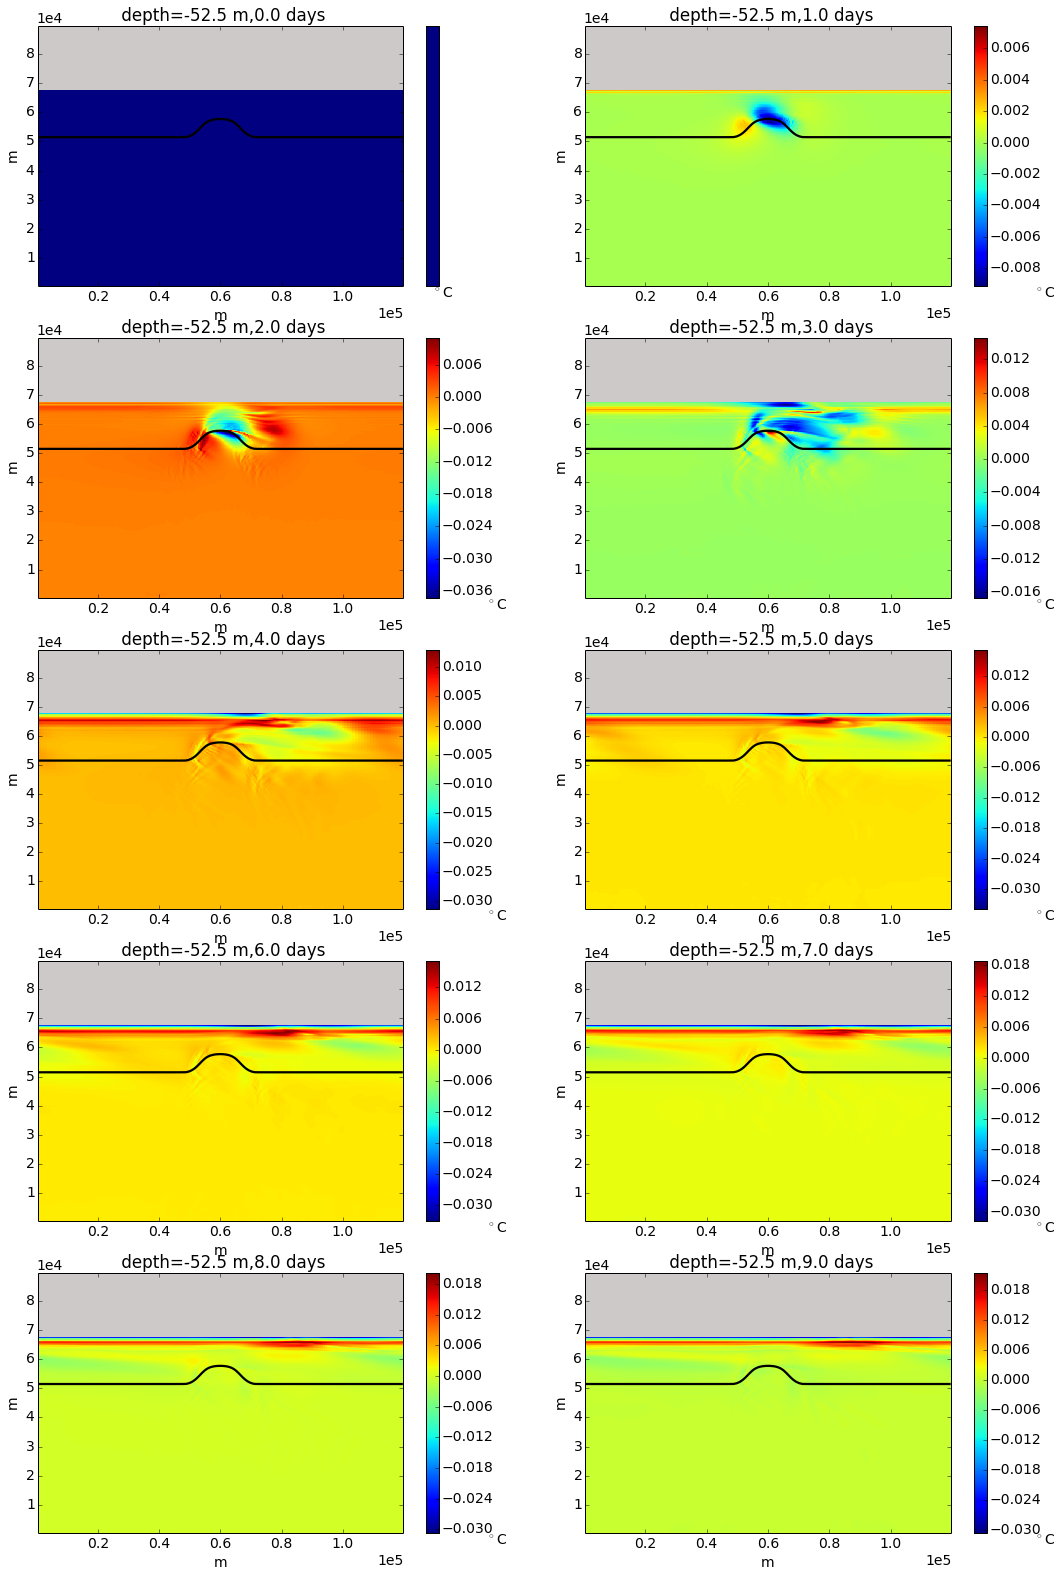

In [14]:
####  PLOT ####
zlev=10
plt.rcParams.update({'font.size':14})

kk=1

fig45=plt.figure(figsize=(18,27))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Temperature run01
        plt.subplot(5,2,kk)
        
        ax = plt.gca()
        CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        #plt.contourf(xc,yc,temp0[tt,zlev,:,:],NumLev)#,cmap=make_cmap(colorsTemp, position=posTemp))
        plt.pcolor(xc,yc,temp0[tt,zlev,:,:]-tempb[tt,zlev,:,:])
        #pl.clim([13.10,13.7])
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
        plt.xlabel('m')
        plt.ylabel('m')
        
        cb = plt.colorbar()
        
        cb.set_label(r'$^{\circ}$C',position=(1, 0),rotation=0)
       
        plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
        kk=kk+1
        

Unstagger all depths of u and v (this will be useful later when plotting cross-sections)

Velocity plots

Along-shelf velocity along canyon axis:

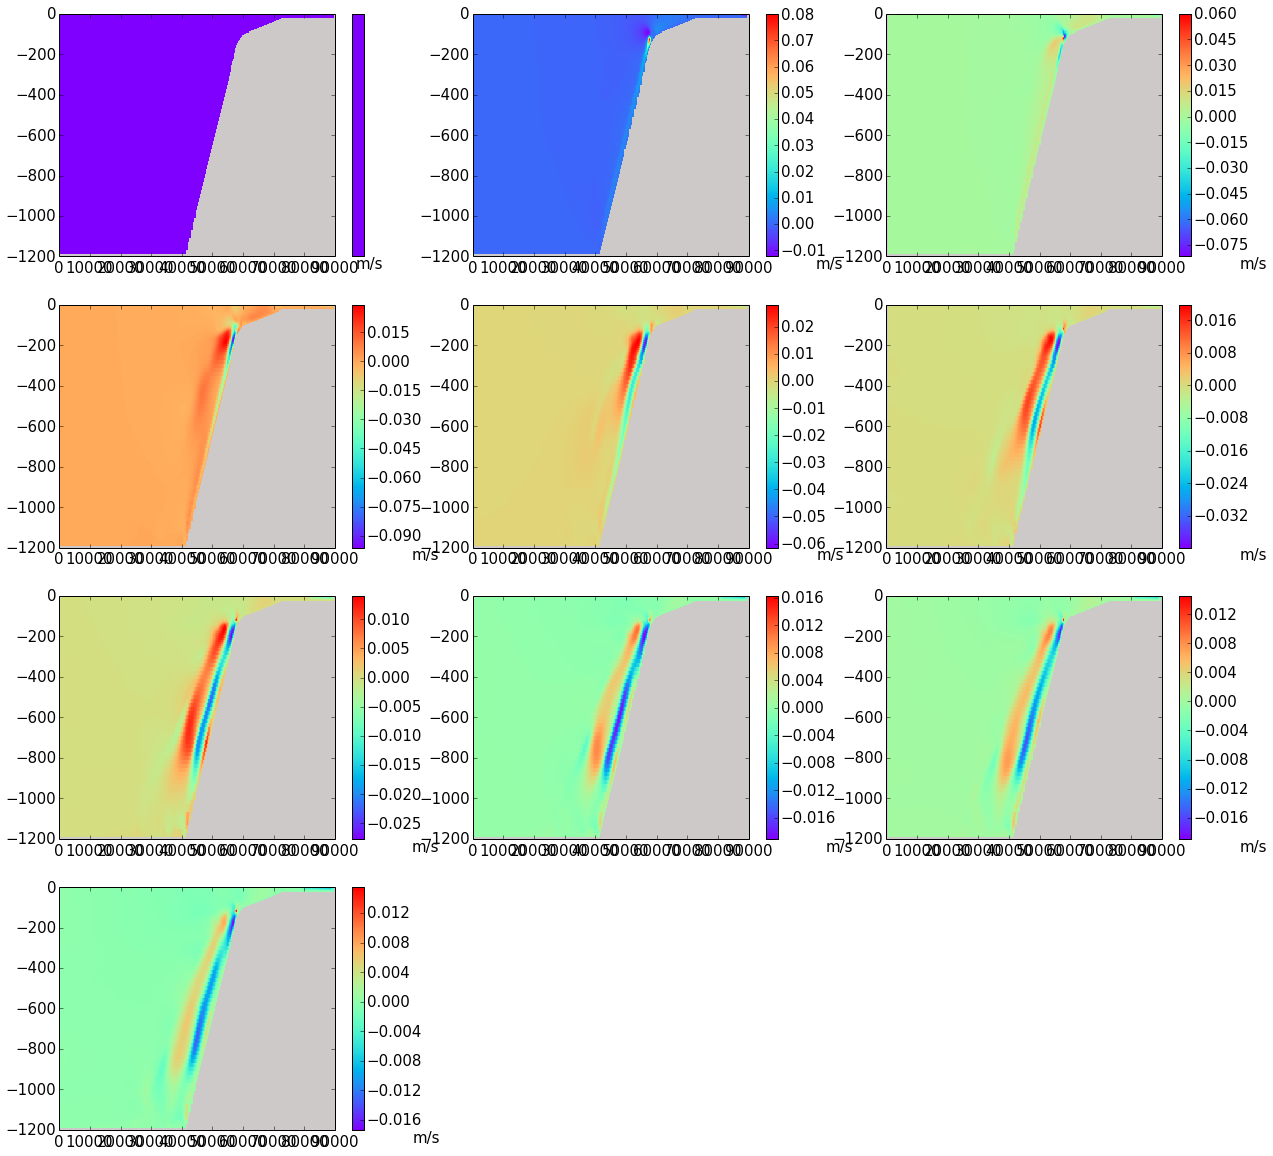

In [16]:
tracA = getField(filename1, 'U')
tracB = getField(filename1B, 'U')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        TrmaskB=np.ma.array(tracB[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        fig1=plt.pcolor(yc[:,180],z[:],TrmaskA[:,:,180]-TrmaskB[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       



Across-shelf velocity along canyon axis:

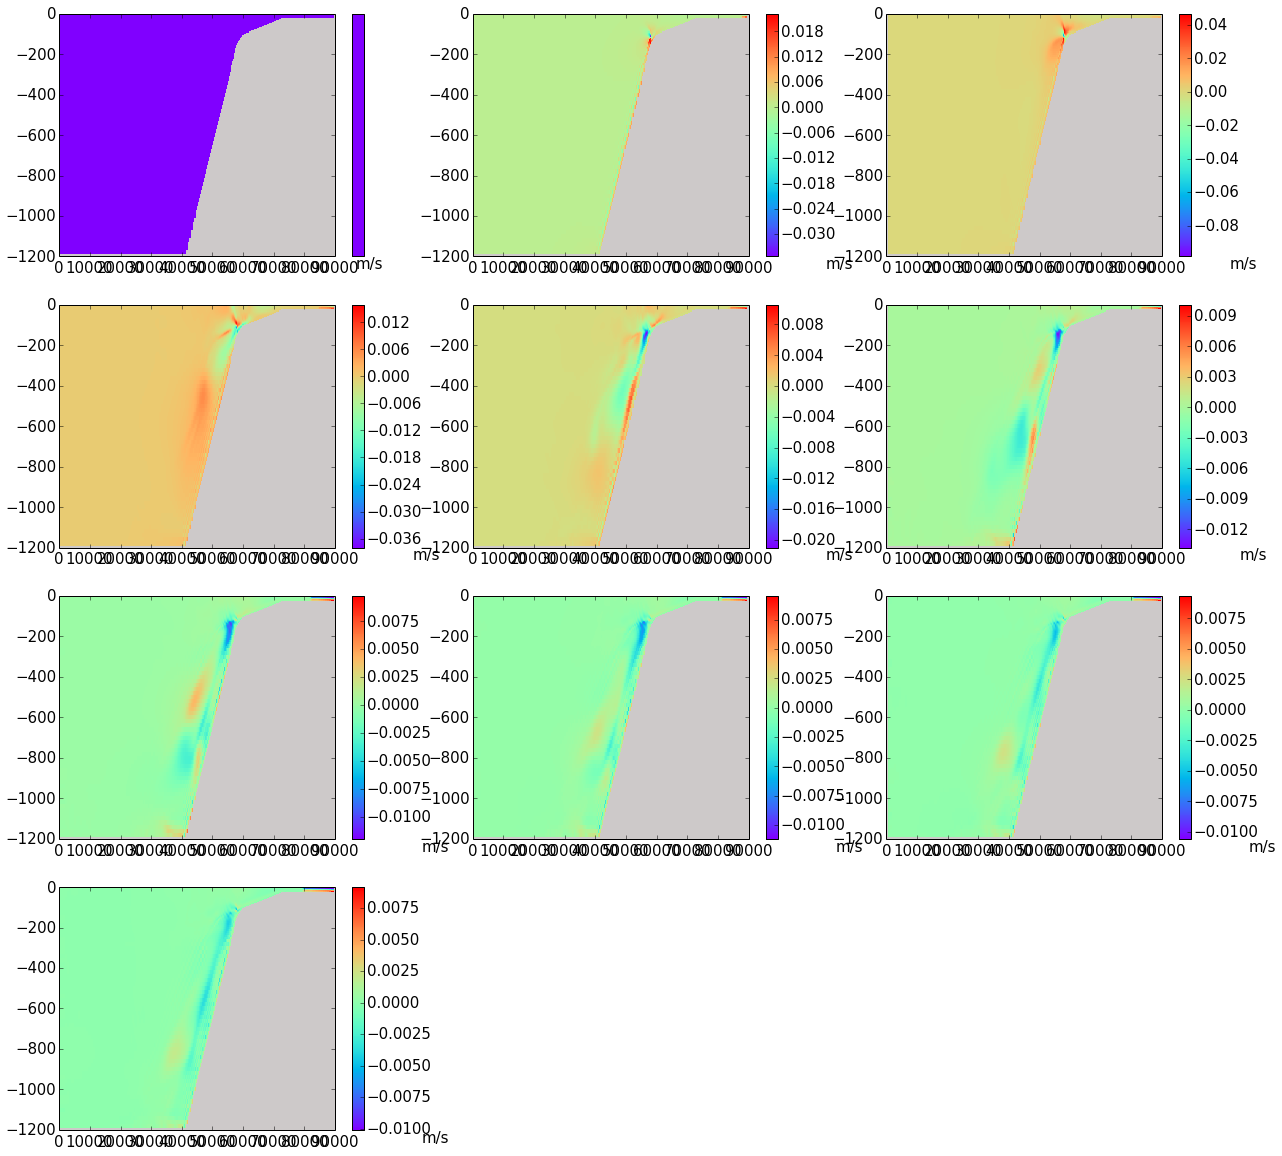

In [17]:
#trac = getField(filename, 'V')


tracA = getField(filename1, 'V')
tracB = getField(filename1B, 'V')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        TrmaskB=np.ma.array(tracB[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        fig1=plt.pcolor(yc[:,180],z[:],TrmaskA[:,:,180]-TrmaskB[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       
       



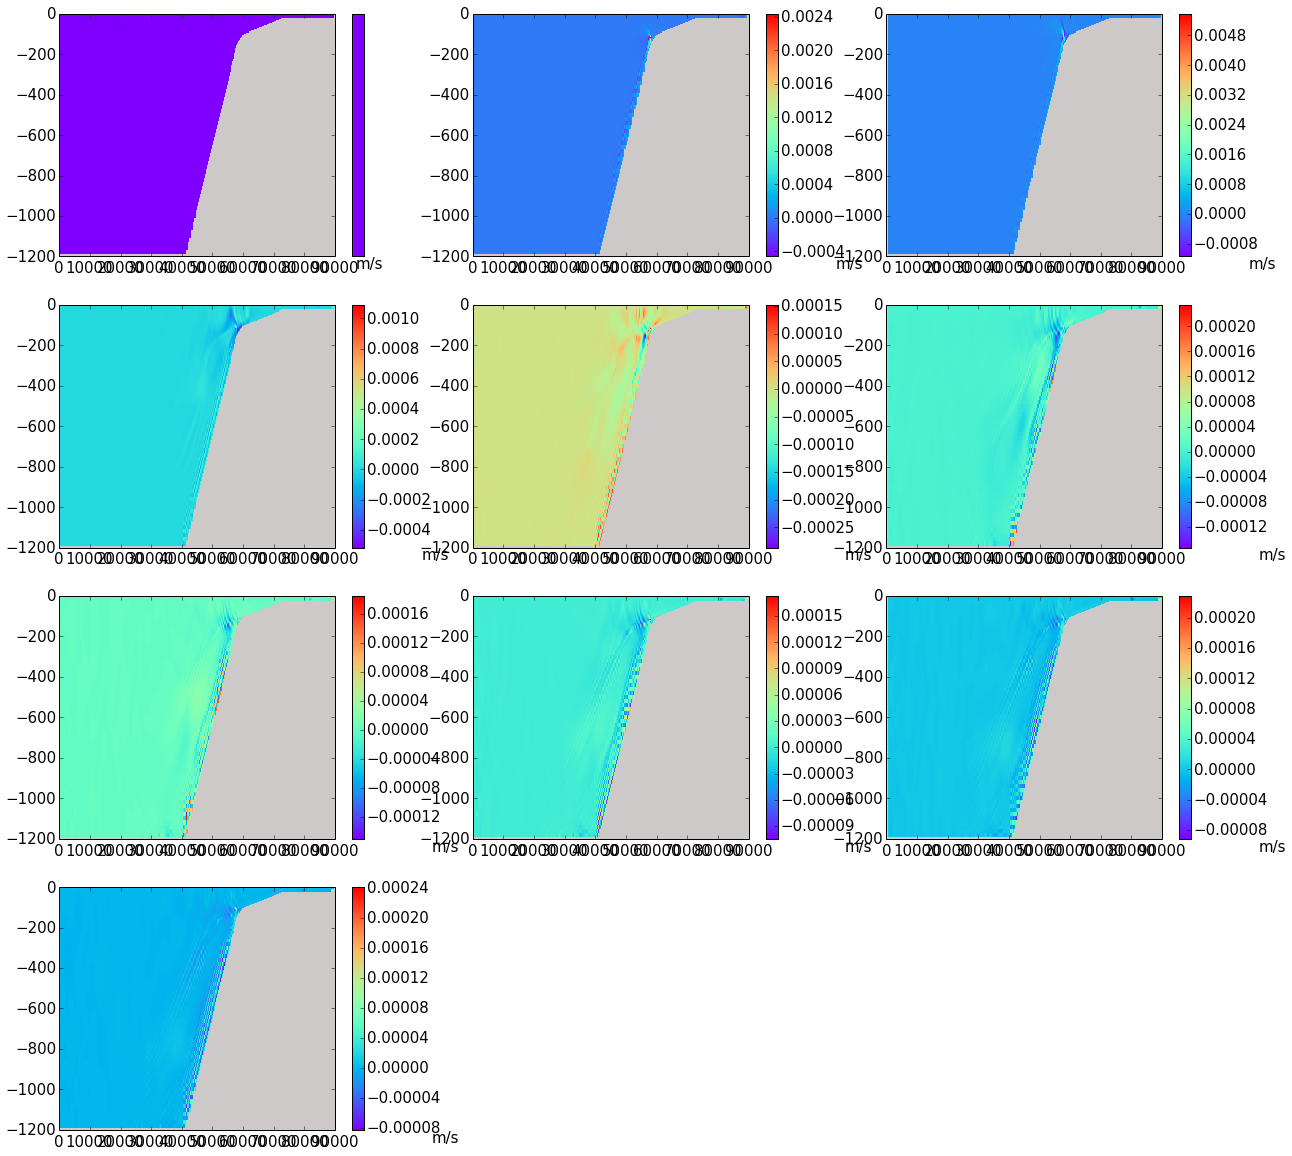

In [18]:
tracA = getField(filename1, 'W')
tracB = getField(filename1B, 'W')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        TrmaskB=np.ma.array(tracB[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        fig1=plt.pcolor(yc[:,180],z[:],TrmaskA[:,:,180]-TrmaskB[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       
        
       



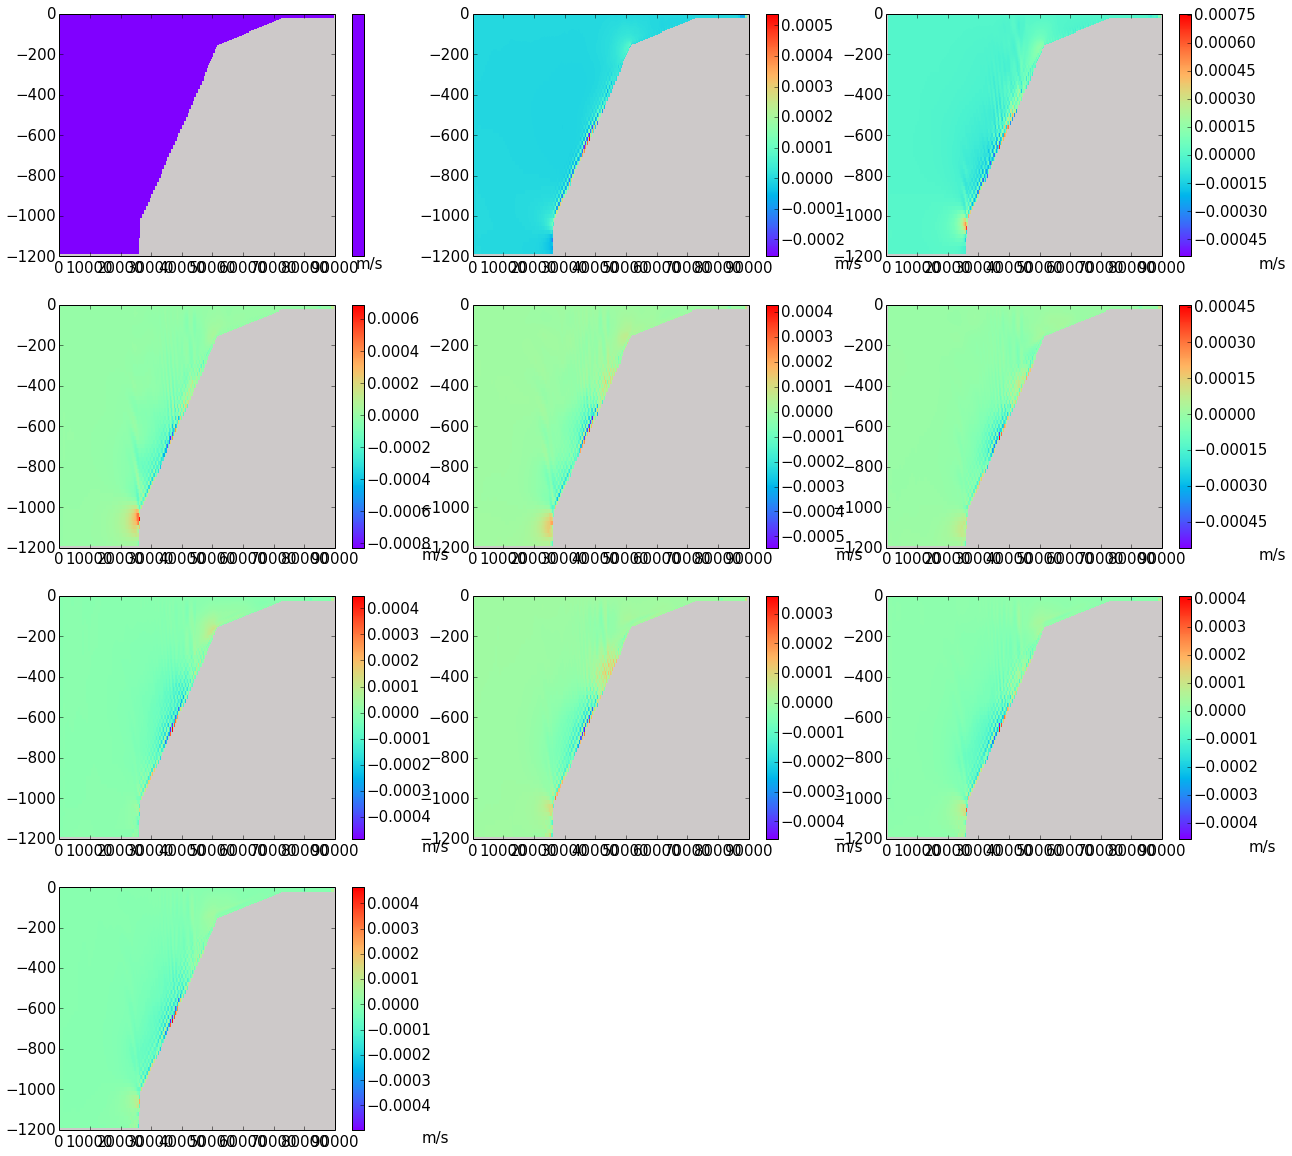

In [19]:
tracA = getField(filename1, 'W')
tracB = getField(filename1B, 'W')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        TrmaskB=np.ma.array(tracB[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        fig1=plt.pcolor(yc[:,100],z[:],TrmaskA[:,:,10]-TrmaskB[:,:,100],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       
       

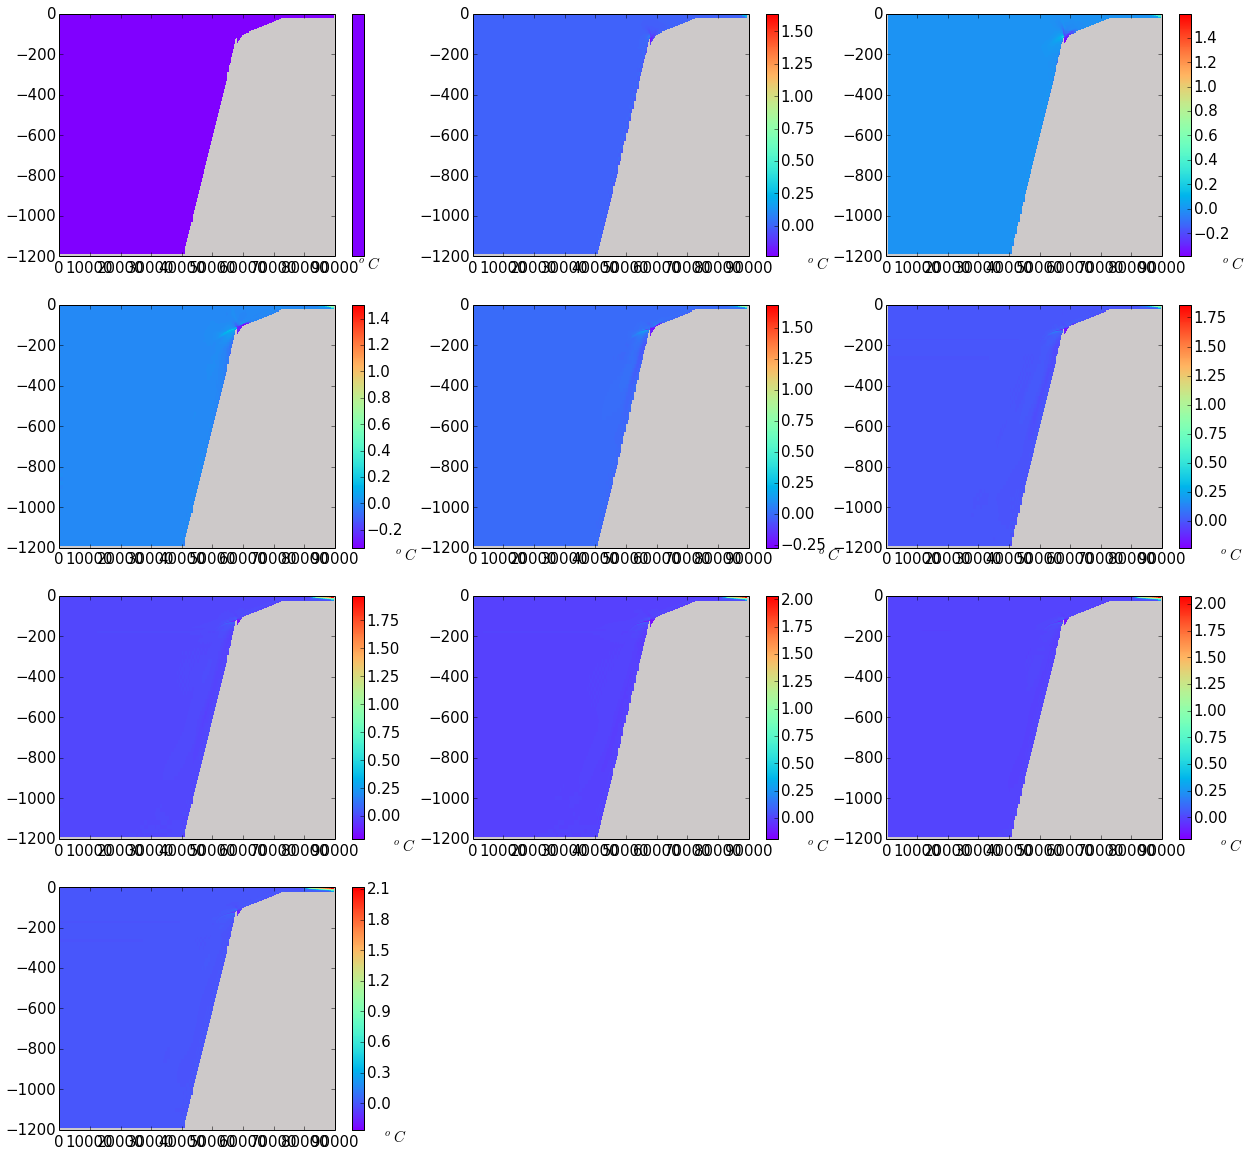

In [39]:

tracA = getField(filename1, 'Temp')
tracB = getField(filename1B, 'Temp')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:-1],mask=MASKhFacC[:,:,:-1])
        TrmaskB=np.ma.array(tracB[tt,:,:,:-1],mask=MASKhFacCB[:,:,:-1])
        fig1=plt.pcolor(yc[:,180],z[:],TrmaskA[:,:,180]-TrmaskB[:,:,180],cmap='rainbow')
        
        #pl.clim([0, 0.4])
        
        cb = plt.colorbar()
        
        cb.set_label('$^oC$', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
        
       

        
       



52100.0


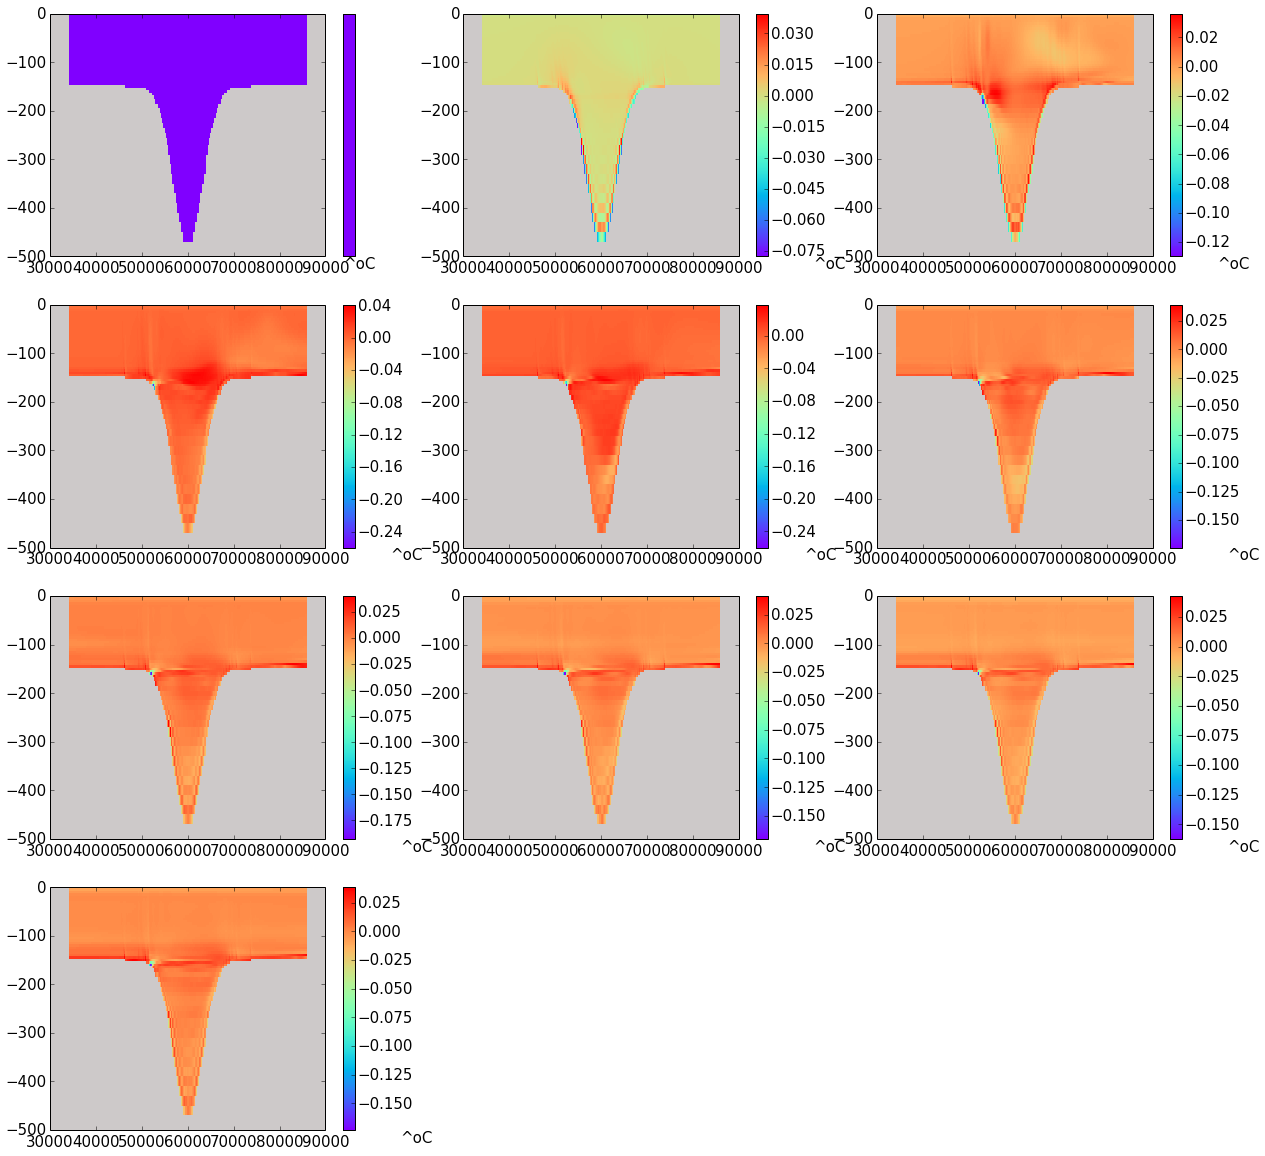

In [30]:
tracA = getField(filename1, 'Temp')
tracB = getField(filename1B, 'Temp')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:],mask=MASKhFacC[:,:,:])
        TrmaskB=np.ma.array(tracB[tt,:,:,:],mask=MASKhFacCB[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TrmaskA[:-35,200,50:-50]-TrmaskB[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        
        
        
        
        cb.set_label('^oC', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


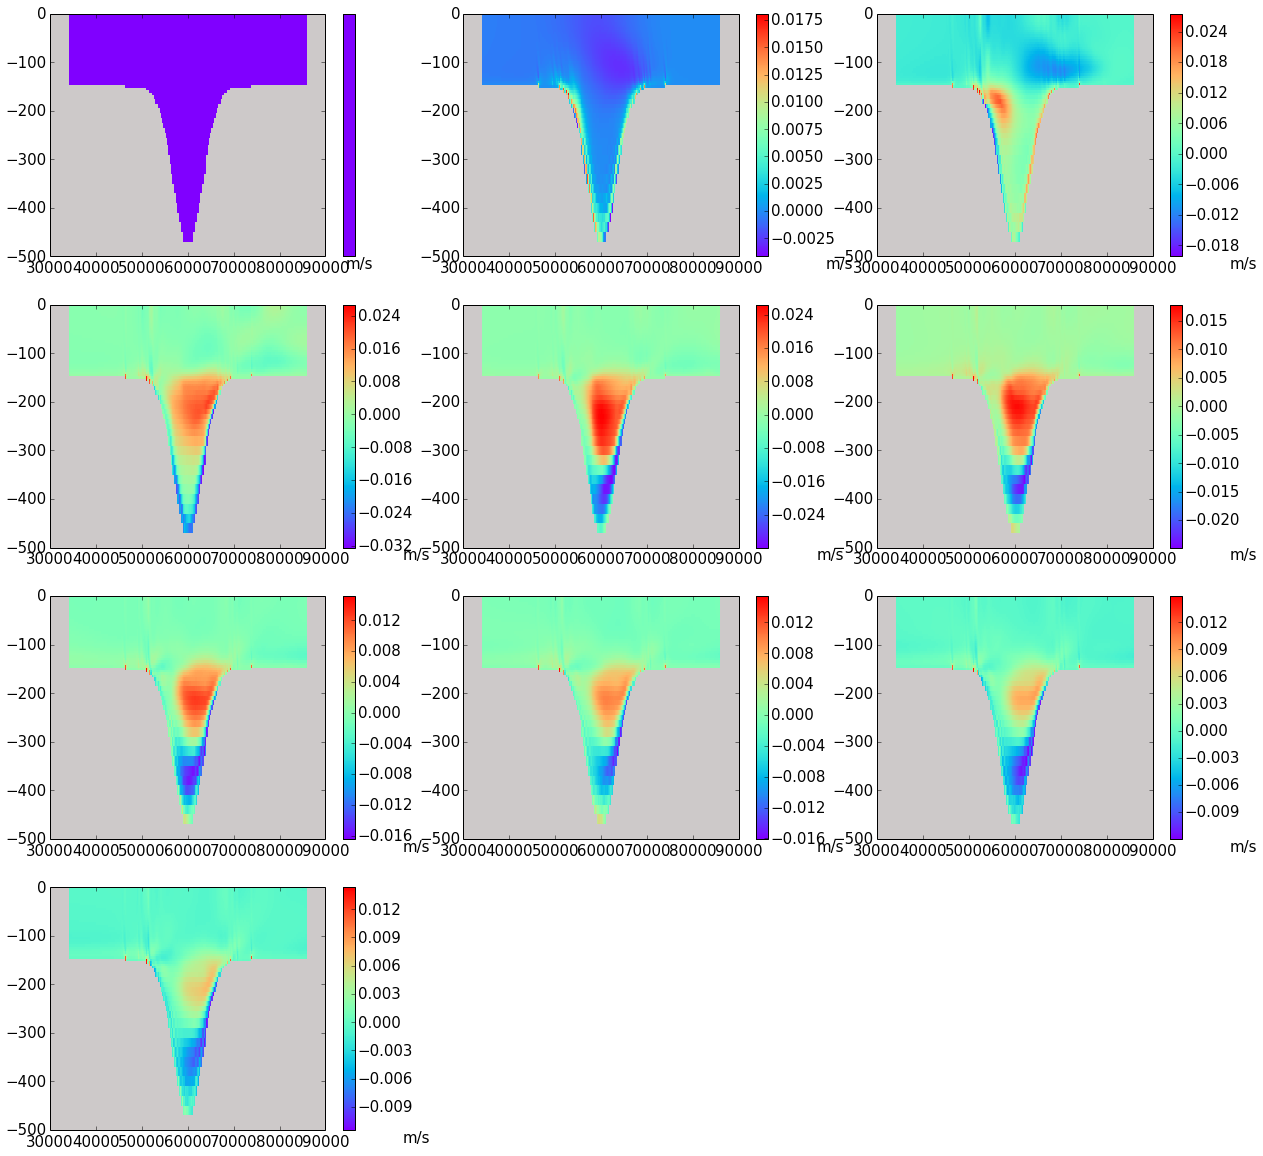

In [31]:
tracA = getField(filename1, 'U')
tracB = getField(filename1B, 'U')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:],mask=MASKhFacC[:,:,:])
        TrmaskB=np.ma.array(tracB[tt,:,:,:],mask=MASKhFacCB[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TrmaskA[:-35,200,50:-50]-TrmaskB[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        
        
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


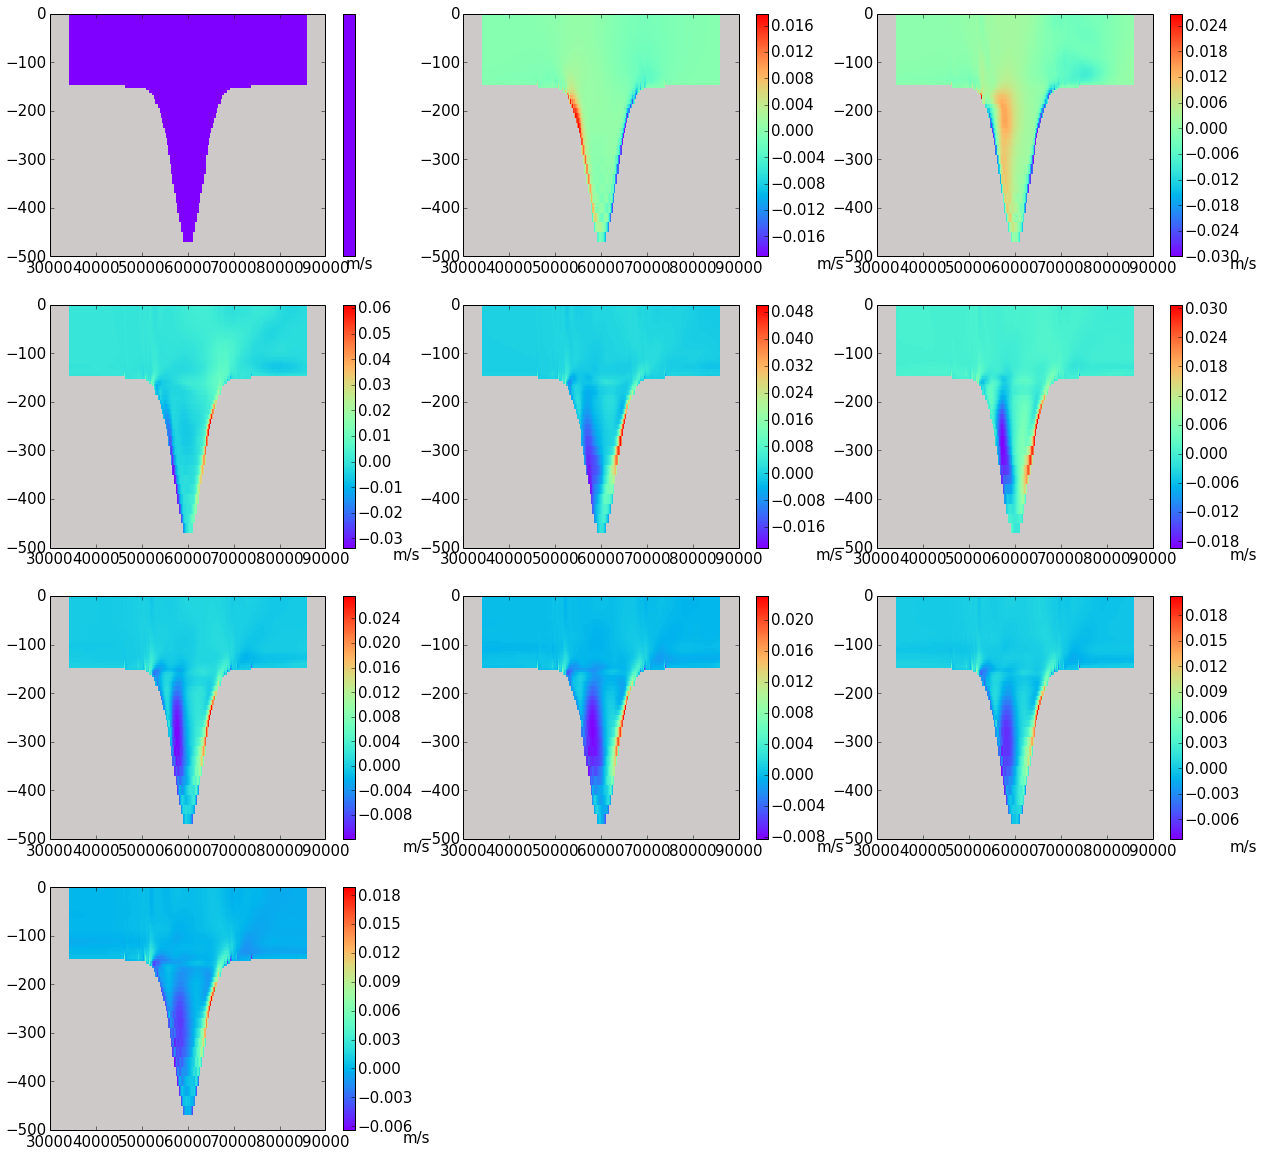

In [32]:
tracA = getField(filename1, 'V')
tracB = getField(filename1B, 'V')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:],mask=MASKhFacC[:,:,:])
        TrmaskB=np.ma.array(tracB[tt,:,:,:],mask=MASKhFacCB[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TrmaskA[:-35,200,50:-50]-TrmaskB[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        
        
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


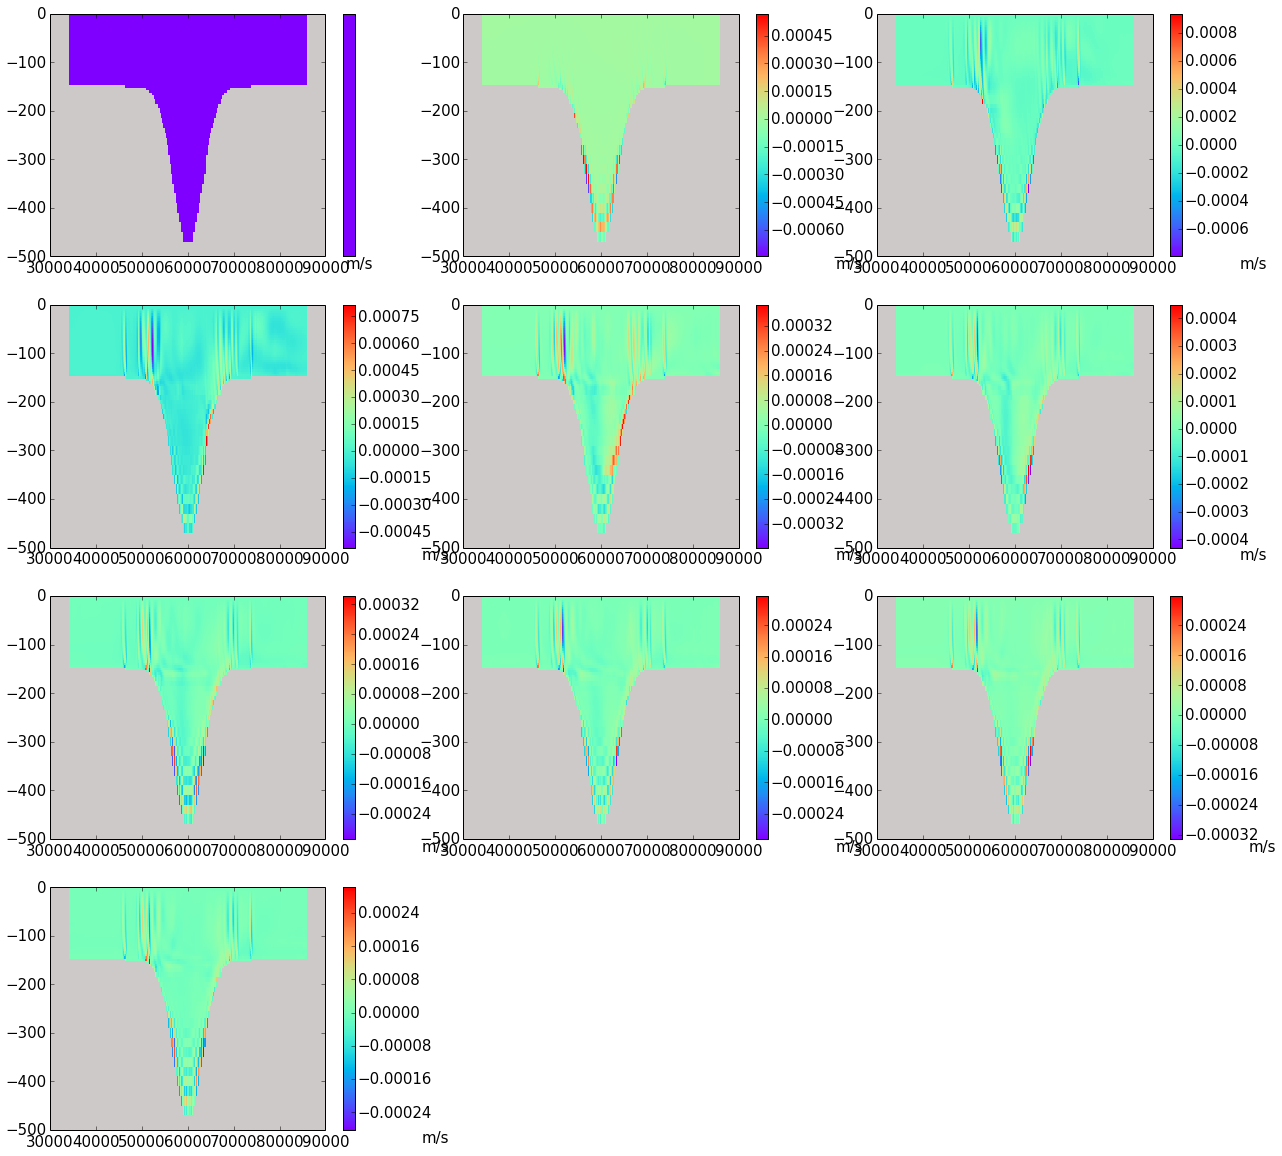

In [33]:
tracA = getField(filename1, 'W')
tracB = getField(filename1B, 'W')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:],mask=MASKhFacC[:,:,:])
        TrmaskB=np.ma.array(tracB[tt,:,:,:],mask=MASKhFacCB[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TrmaskA[:-35,200,50:-50]-TrmaskB[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        
        
        
        
        cb.set_label('m/s', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  

52100.0


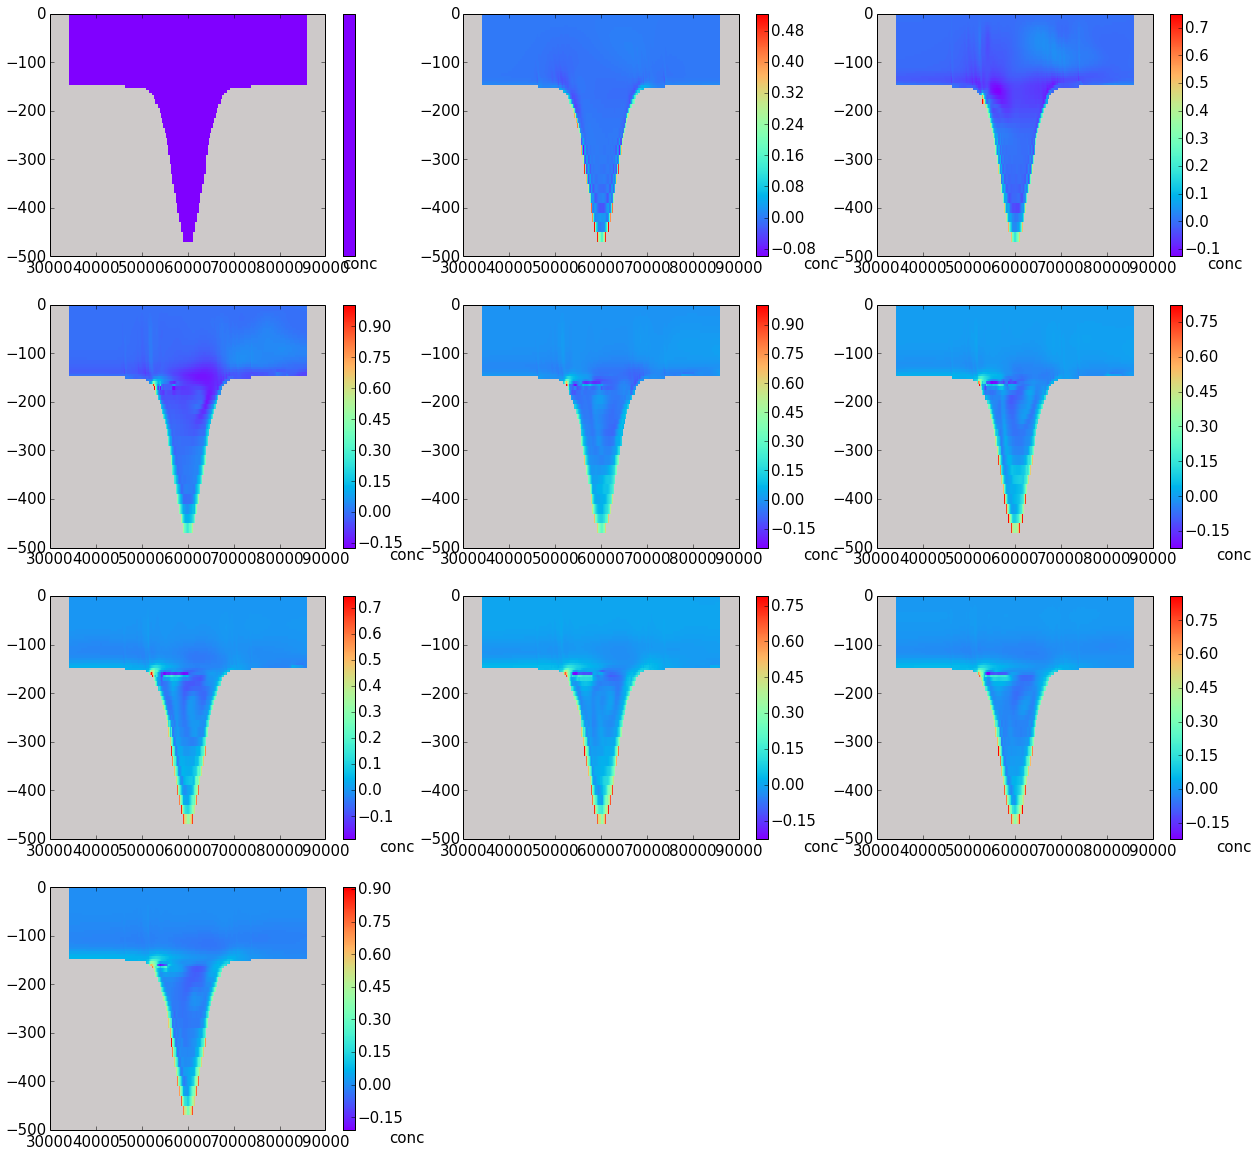

In [34]:

tracA = getField(filename3, 'Tr2')
tracB = getField(filename3B, 'Tr1')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:],mask=MASKhFacC[:,:,:])
        TrmaskB=np.ma.array(tracB[tt,:,:,:],mask=MASKhFacCB[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TrmaskA[:-35,200,50:-50]-TrmaskB[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        #CS2 = plt.contour(CS, levels=CS.levels[::2],
        #                colors = 'k',
        #                hold='on')
        
        
        
        
        cb.set_label('conc', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])    

52100.0


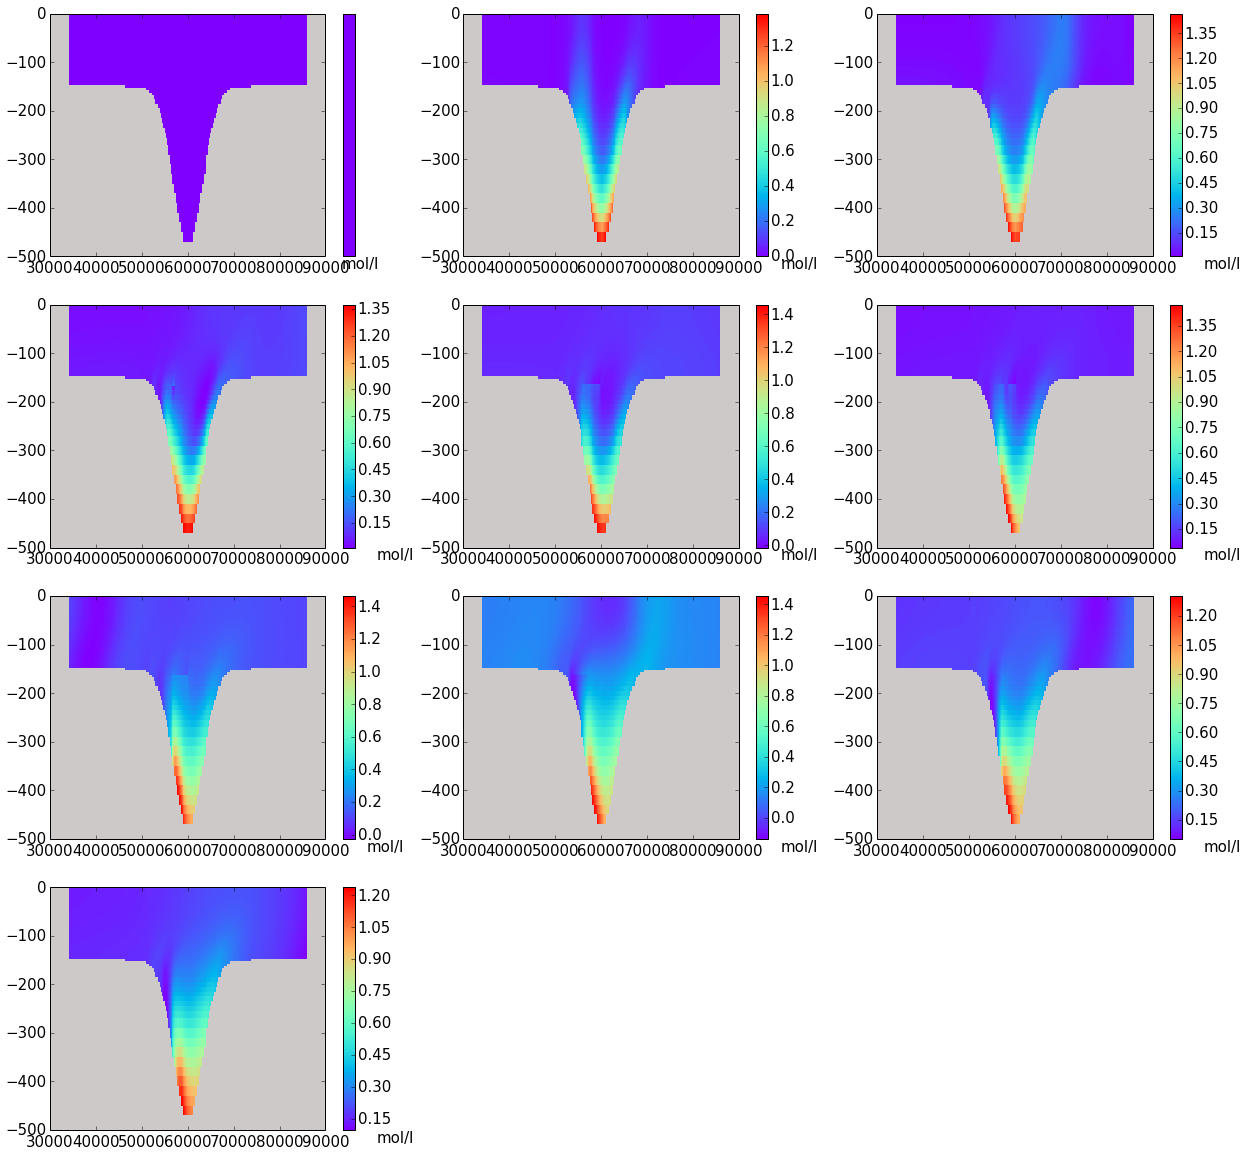

In [37]:
tracA = getField(filename3, 'Tr3')
tracB = getField(filename3B,'Tr3')

plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

for tt in [0,2,4,6,8,10,12,14,16,18] :
        
        ### Upstream speed 
        
        plt.subplot(4,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        
        TrmaskA=np.ma.array(tracA[tt,:,:,:],mask=MASKhFacC[:,:,:])
        TrmaskB=np.ma.array(tracB[tt,:,:,:],mask=MASKhFacCB[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        CS=plt.pcolor(xc[200,50:-50],z[:-35],TrmaskA[:-35,200,50:-50]-TrmaskB[:-35,200,50:-50],cmap='rainbow')
        #plt.clim([9, 14])
        cb = plt.colorbar()
        
        
       
        
        
        cb.set_label('mol/l', position=(1, 0),rotation=0)
        
        
       
            
        kk=kk+1
print(yc[200,0])  



        
        
        
        
        
    